# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here
print("Chau Anh Nguyen")


Chau Anh Nguyen


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:
print("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", <br>
"pandas", "statsmodels.api" and "statsmodels.formula.api"


In [3]:
# Write your answer here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

<font size = "5">

Read the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting <br>
to get a sense of its content

In [51]:
# Write your own code
df = pd.read_csv("data_quiz/fifa23_players_basic.csv")
#display(df)

<font size = "5">

(a) Use queries + global variables

<font size = "3">

- Subset the players whose value of the column "On Loan" is "YES" <br>
and store it in a new dataset
- How many players are on loan?

HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
and when the value is a string. <br>
Reference the column as ``` `On Loan` ``` inside .query()

In [52]:
# Write your own code
on_loan = df.query("`On Loan` == 'YES'")
print(len(on_loan["On Loan"]))

# There 1229 players on loan

1229


<font size = "5">

(b) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "Overall"
- If "Overall > 90", classification = "Top Performer"
- If "Overall <= 90", classification = "Non Top-Performer"
- The function returns "classification"

Step 2:
- Extract the column "Overall" in the dataset <br>
(be carefeful to write the "O" capitalized)
- Create a new variable called "player_classification" <br>
to assign each player to the correct classification

HINT: Use the ".apply()" function

In [53]:
# Write your own code
def new_fx(Overall):
    if Overall > 90:
        classification = "Top Performer"
    else:
        classification = "Non Top-Performer"
    return classification

df["player_classification"] = df["Overall"].apply(new_fx)
display(df["player_classification"])


0            Top Performer
1            Top Performer
2            Top Performer
3            Top Performer
4            Top Performer
               ...        
18534    Non Top-Performer
18535    Non Top-Performer
18536    Non Top-Performer
18537    Non Top-Performer
18538    Non Top-Performer
Name: player_classification, Length: 18539, dtype: object

<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

The varable "Joined On" shows the date in which each player joined FIFA
- Use ".sort_values()" to order the "Joined On" column <br>
from earlier data to later date
- Get a subset with the 6 players in the dataset <br>
who joined FIFA earliest
- From this subset, display the year in which they joined <br>
by displaying the column "Joined On"

In [54]:
# Write your own code
joindate_sorted = df.sort_values(by = "Joined On", ascending = True)
joindate_sorted.iloc[:6,:]["Joined On"]
display(joindate_sorted.iloc[:6,:]["Joined On"])


8586     2002
10877    2003
4324     2004
11056    2005
10360    2005
11768    2005
Name: Joined On, dtype: int64

<font size = "5">

(d) Regression function

<font size = "3">

- Run a regression of "Potential" (left-hand side) on "Age" (right-hand side)
- What are the values of the coefficients?

[HINT: Use the commands ```smf.ols()``` and ```.fit()``` and ```.params``` <br>
from Lecture 11 ]


In [55]:
# Write your own code
model = smf.ols(formula = 'df["Potential"] ~ df["Age"]', data = df)
results = model.fit()
reg_results = results.params
reg_results

Intercept    79.752454
df["Age"]    -0.346103
dtype: float64

<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Store the total number of rows of the dataset in a variable called ```n``` <br>
- Create a new variable called ```random_var``` drawn from a <br>
uniform distribution between 0 and 1 with size ```n```
- Use .query() to subset all observations with ```random_var <0.5```.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with ```random_var >= 0.5```.<br>
store it in a new dataset called "data1"

[HINT: See Lecture 2 for how to generate a uniform random variable]


In [40]:
# Write your own code
n = len(df)
df["random_var"] = np.random.uniform(low = 0,high = 1, size = n)

data0 = df.query("random_var < 0.5")
data1 = df.query("random_var >= 0.5")

display(data0)
display(data1)


,Unnamed: 0,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,...,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,player_classification,random_var
0,0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,...,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,Top Performer,0.414734
5,5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,...,4,4,-,-,-,-,High,Medium,Non Top-Performer,0.082334
7,7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,...,1,5,Germany,https://cdn.sofifa.net/flags/de.png,GK,1,Medium,Medium,Non Top-Performer,0.279474
8,8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,...,5,5,Portugal,https://cdn.sofifa.net/flags/pt.png,ST,7,High,Low,Non Top-Performer,0.138332
9,9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,...,2,4,Netherlands,https://cdn.sofifa.net/flags/nl.png,CB,4,Medium,High,Non Top-Performer,0.166533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18532,18532,H. Singh,Harmanpreet Singh,48,56,100000,ST,ST,India,https://cdn.sofifa.net/players/259/745/23_60.png,...,2,1,-,-,-,-,Medium,Low,Non Top-Performer,0.384338
18534,18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,...,2,1,-,-,-,-,Medium,Medium,Non Top-Performer,0.009184
18535,18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,...,2,1,-,-,-,-,Medium,Medium,Non Top-Performer,0.050893
18536,18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,...,2,1,-,-,-,-,High,Medium,Non Top-Performer,0.232147


,Unnamed: 0,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,...,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,player_classification,random_var
1,1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,...,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,Top Performer,0.938299
2,2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,...,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,Top Performer,0.981630
3,3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,...,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,Top Performer,0.845341
4,4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,...,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,Top Performer,0.917728
6,6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,...,1,4,Belgium,https://cdn.sofifa.net/flags/be.png,GK,1,Medium,Medium,Non Top-Performer,0.935823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18527,18527,Liu Junxian,Junxian Liu,48,58,110000,ST,ST,China PR,https://cdn.sofifa.net/players/264/056/23_60.png,...,2,1,-,-,-,-,Medium,Medium,Non Top-Performer,0.666455
18529,18529,Guo Yunqi,Yunqi Guo,48,51,60000,CM,CAM,China PR,https://cdn.sofifa.net/players/257/934/23_60.png,...,2,1,-,-,-,-,Medium,Medium,Non Top-Performer,0.542442
18531,18531,Liao Wei,Wei Liao,48,54,70000,"RM,LM",CDM,China PR,https://cdn.sofifa.net/players/257/691/23_60.png,...,2,1,-,-,-,-,Medium,Medium,Non Top-Performer,0.544752
18533,18533,Pi Ziyang,Ziyang Pi,47,60,110000,CM,CAM,China PR,https://cdn.sofifa.net/players/269/066/23_60.png,...,2,1,-,-,-,-,Medium,Medium,Non Top-Performer,0.840091


<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display the distribution of "Age" for "data0" and "data1" using <br>
```plt.hist()```
- You will need to label the axes, and the title
- To get full points, plot the histograms with the option  ```alpha = 0.5```, e.g. <br>
 ``` plt.hist(x = ..., alpha = 0.5) ``` <br>
 Make sure to substitute the corresponding "x" vector instead of ```...``` <br>
(The alpha option sets the transparency of the histogram )

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

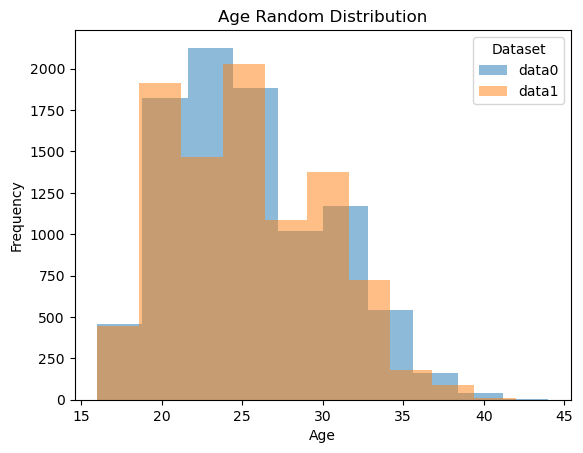

In [44]:
# Write your own code
plt.hist(x = data0["Age"], alpha = 0.5)
plt.hist(x = data1["Age"], alpha = 0.5)
plt.legend(labels = ["data0", "data1"], title = "Dataset")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Random Distribution")
plt.show()
plt.show()
